In [2]:
import pandas as pd
import numpy as np
import numpy.linalg as npl
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
trainDf = pd.read_csv('../data/train.csv', index_col=0)
testDf = pd.read_csv('../data/test.csv', index_col=0)

In [4]:
trainDf.head()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
id,,,,,,,,,,,,,,,,,,,,,
0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,11.938294,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,0.000000,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,6.606882,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,0.000000,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,12.841643,...,9.589074,33.333333,2,2,1,0,1,1,1,0


## train

In [5]:
for count in trainDf.count():
    if count != trainDf.shape[0]:
        print('Nan exist')

In [6]:
set(trainDf.columns) - set(testDf.columns)

{'EC1', 'EC2', 'EC3', 'EC4', 'EC5', 'EC6'}

In [7]:
trainDf.drop([f'EC{i}'for i in range(3,7)], axis=1, inplace=True)

## GradientBoosting

In [8]:
trainDf.describe()

,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,EState_VSA2,...,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2
count,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,...,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000,14838.000000
mean,515.153604,9.135189,5.854307,6.738497,4.432570,5.253221,3.418749,1.773472,29.202823,10.435316,...,11.318811,6.704487,15.666766,31.066423,13.636941,49.309959,0.458215,0.459226,0.667745,0.798962
std,542.456370,6.819989,4.647064,5.866444,3.760516,4.925065,3.436208,1.865898,31.728679,13.651843,...,20.169745,10.865415,18.080208,33.896638,14.598554,29.174824,0.667948,0.668111,0.471038,0.400790
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.430556,0.000000,0.000000,0.000000,0.000000
25%,149.103601,4.680739,2.844556,2.932842,1.949719,2.034468,1.160763,0.503897,5.969305,0.000000,...,0.000000,0.000000,5.969305,6.420822,4.794537,30.000000,0.000000,0.000000,0.000000,1.000000
50%,290.987941,6.485270,4.052701,4.392859,2.970427,3.242775,1.948613,1.073261,17.353601,6.420822,...,0.000000,0.000000,11.752550,20.075376,9.589074,41.666667,0.000000,0.000000,1.000000,1.000000
75%,652.652585,11.170477,7.486791,8.527859,5.788793,6.609350,4.502070,2.534281,44.876559,12.841643,...,13.847474,6.923737,17.721856,42.727765,14.912664,56.090650,1.000000,1.000000,1.000000,1.000000
max,4069.959780,69.551167,50.174588,53.431954,32.195368,34.579313,22.880836,16.072810,363.705954,99.936429,...,211.501279,100.348416,80.742293,492.729739,115.406157,384.450519,8.000000,8.000000,1.000000,1.000000


In [9]:
X2 = trainDf.drop(['EC1', 'EC2'], axis=1)
y2 = trainDf['EC2']
X1 = trainDf.drop(['EC1'], axis=1)
y1 = trainDf['EC1']

In [10]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN()
X2_re, y2_re = smote_enn.fit_resample(X2,y2)
y2_re.mean(), y2.mean()

(0.3154134295227525, 0.7989621242755088)

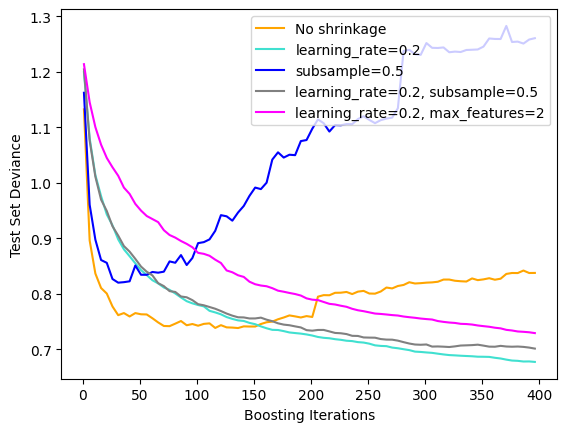

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_re, y2_re, test_size=0.2)

gbc = GradientBoostingClassifier()

original_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}

plt.figure()

for label, color, setting in [
    ("No shrinkage", "orange", {"learning_rate": 1.0, "subsample": 1.0}),
    ("learning_rate=0.2", "turquoise", {"learning_rate": 0.2, "subsample": 1.0}),
    ("subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.5",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X2_train, y2_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_proba in enumerate(clf.staged_predict_proba(X2_test)):
        test_deviance[i] = 2 * log_loss(y2_test, y_proba[:, 1])

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_re, y2_re, test_size=0.2)

gbc = GradientBoostingClassifier()

original_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}

plt.figure()

for label, color, setting in [
    ("No shrinkage", "orange", {"learning_rate": 1.0, "subsample": 1.0}),
    ("learning_rate=0.2", "turquoise", {"learning_rate": 0.2, "subsample": 1.0}),
    ("subsample=0.5", "blue", {"learning_rate": 1.0, "subsample": 0.5}),
    (
        "learning_rate=0.2, subsample=0.5",
        "gray",
        {"learning_rate": 0.2, "subsample": 0.5},
    ),
    (
        "learning_rate=0.2, max_features=2",
        "magenta",
        {"learning_rate": 0.2, "max_features": 2},
    ),
]:
    params = dict(original_params)
    params.update(setting)

    clf = GradientBoostingClassifier(**params)
    clf.fit(X2_train, y2_train)

    # compute test set deviance
    test_deviance = np.zeros((params["n_estimators"],), dtype=np.float64)

    for i, y_proba in enumerate(clf.staged_predict_proba(X2_test)):
        test_deviance[i] = 2 * log_loss(y2_test, y_proba[:, 1])

    plt.plot(
        (np.arange(test_deviance.shape[0]) + 1)[::5],
        test_deviance[::5],
        "-",
        color=color,
        label=label,
    )

plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Test Set Deviance")

plt.show()

In [15]:
original_params = {
    "n_estimators": 400,
    "max_leaf_nodes": 4,
    "max_depth": None,
    "random_state": 2,
    "min_samples_split": 5,
}
params = dict(original_params)
params.update({"learning_rate": 0.2, "subsample": 1.0})

gbc2 = GradientBoostingClassifier(**params)
gbc_model_2 = gbc2.fit(X2,y2)

In [16]:
gbc1 = GradientBoostingClassifier(**params)
gbc_model_1 = gbc1.fit(X1,y1)

## Test

In [17]:
model1_testDf = testDf.copy()

In [18]:
model1_testDf['EC2'] = gbc_model_2.predict(testDf)

In [23]:
EC2 = gbc_model_2.predict_proba(testDf)[:,1]
EC1 = gbc_model_1.predict_proba(model1_testDf)[:,1]
submissionFile = pd.DataFrame({'EC1':EC1, 'EC2':EC2}, index=testDf.index)
submissionFile.to_csv('testSubmission3.csv')